In [4]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:
img_array = cv2.imread(r"C:\Users\ad200\Desktop\jupyter projects\FaceMaskProject\Dataset\Mask\00000_Mask.jpg")

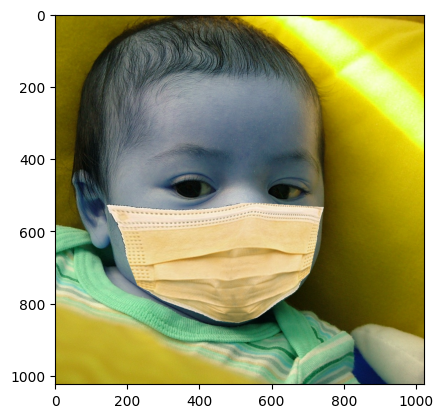

In [6]:
plt.imshow(img_array) ##BGR

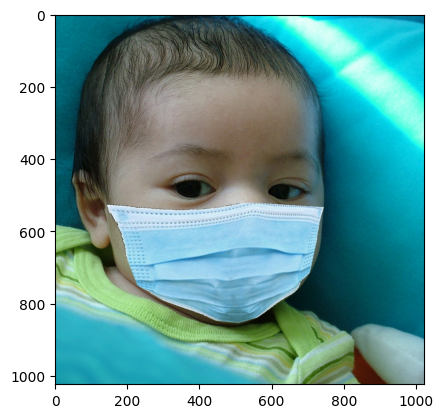

In [7]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [8]:
img_array.shape

(1024, 1024, 3)

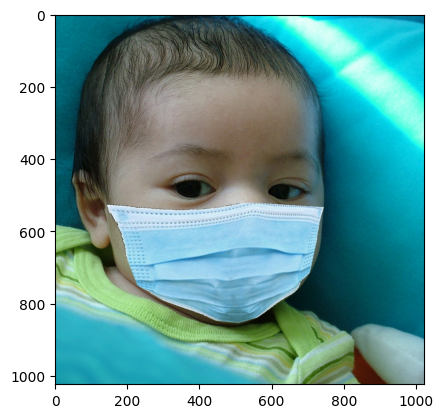

In [9]:
Datadirectory = r"C:\Users\ad200\Desktop\jupyter projects\FaceMaskProject\Dataset" ##training dataset
Classes = ["Mask","NoMask"] ##list of classes
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        #backToRgb=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

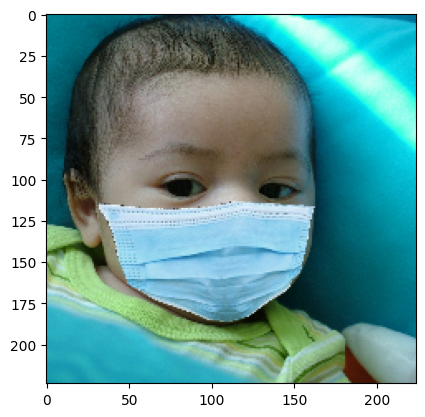

In [10]:
img_size=224 ## Image=> 224*224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

reading the images and converting all to array

In [11]:
training_Data = [] #data

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)##0,1 ##label
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass    
create_training_Data()
print(len(training_Data))            

1950


In [12]:
import random
random.shuffle(training_Data)

In [13]:
X=[] ##data/feature
Y=[] ##label

for features,label in training_Data:
    X.append(features)
    Y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3)    

In [14]:
X.shape

(1950, 224, 224, 3)

In [15]:
#normalize the data
X=X/255.0; ##we are normalizing it

In [16]:
Y[0]

1

In [17]:
Y[1000]

0

In [18]:
Y=np.array(Y)

In [19]:
import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("Y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()

In [20]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

pickle_in=open("Y.pickle","rb")
Y=pickle.load(pickle_in)

deep learning model for training - Transfer Learning

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = tf.keras.applications.MobileNet() 
##pre-trained model

In [23]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

Transfer Learning - Tuning, weights will start from last check point

In [24]:
base_input=model.input

In [25]:
base_output=model.layers[-4].output

In [26]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer) ## 0,1
final_output=layers.Activation('sigmoid')(final_output)

In [27]:
new_model=keras.Model(inputs=base_input, outputs=final_output)

In [28]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

settings for binary classification (Face mask/ without mask)

In [29]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [30]:
new_model.fit(X,Y,epochs=1,validation_split=0.1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 229s 4s/step - accuracy: 0.9551 - loss: 0.1070 - val_accuracy: 0.9795 - val_loss: 0.1177


In [31]:
new_model.save('my_model3.h5')

In [32]:
new_model=tf.keras.models.load_model('my_model3.h5')

Checking the network for Predictions

In [33]:
frame=cv2.imread(r"C:\Users\ad200\Desktop\jupyter projects\FaceMaskProject\Dataset\Mask\00002_Mask.jpg")

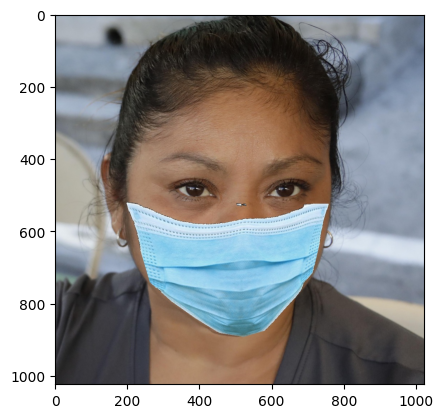

In [34]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [35]:
final_image=cv2.resize(frame,(224,224))
final_image=np.expand_dims(final_image,axis=0) ##need fourth dimension
final_image=final_image/225.0

In [36]:
Predictions=new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


In [37]:
Predictions

array([[5.0312576e-07]], dtype=float32)

checking the network for unknown Images

In [38]:
frame=cv2.imread(r"C:\Users\ad200\Downloads\b99b8649c4bf0c731693666ab8015c90.jpg")

In [39]:
frame.shape

(472, 236, 3)

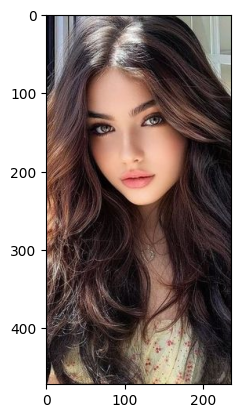

In [40]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [41]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [42]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [43]:
gray.shape

(472, 236)

In [44]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    faces=faceCascade.detectMultiScale(roi_gray)
    if len(faces)==0:
        print("Face not detected")
    else: 
        for (ex,ey,ew,eh) in faces:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]    

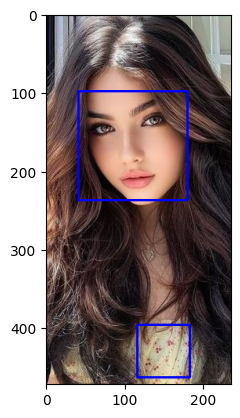

In [45]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

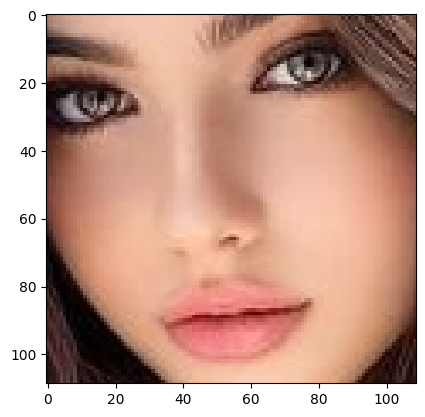

In [46]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [47]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0) ##need fourth dimension
final_image=final_image/225.0

In [48]:
Predictions=new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [49]:
Predictions

array([[1.]], dtype=float32)

In [50]:
frame=cv2.imread(r"C:\Users\ad200\Downloads\closeup-portrait-her-she-nice-600nw-1725508987.webp")

In [51]:
frame.shape

(400, 600, 3)

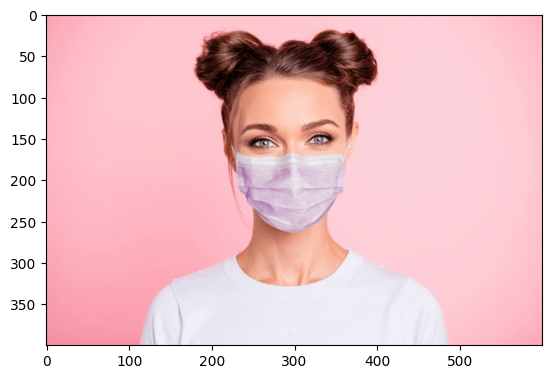

In [52]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [53]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [54]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [55]:
gray.shape

(400, 600)

In [56]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    faces=faceCascade.detectMultiScale(roi_gray)
    if len(faces)==0:
        print("Face not detected")
    else: 
        for (ex,ey,ew,eh) in faces:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]    

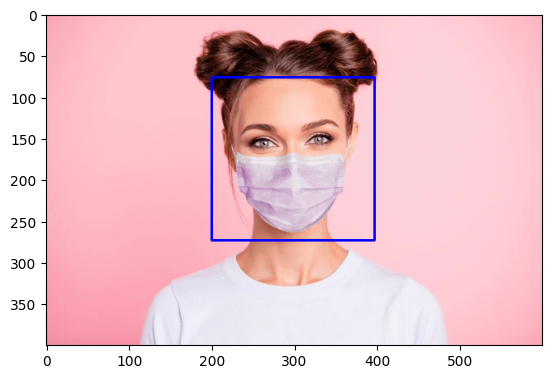

In [57]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

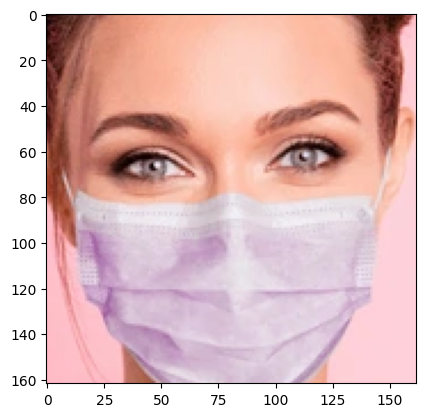

In [58]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [59]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0) ##need fourth dimension
final_image=final_image/225.0

In [60]:
Predictions=new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [61]:
Predictions

array([[0.99999994]], dtype=float32)

Realtime Video Demo

Face Mask Detection

In [2]:
import cv2 ###pip install open-cv python
## pip install opencv-contrib-python fullpackage
# from deepface import Deepface ##pip install deepface
path="haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

#set the rectangle background to white
rectangle_bgr=(255,255,255)
#make a black image
img=np.zeros((500,500))
#set some text
text="Some text in a box!"
#get the width and height of the text box
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
#set the text start position
text_offset_x=10
text_offset_y=img.shape[0]-25
#make the coords of the box with a small padding of two pixels
box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)

cap=cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret,frame=cap.read()
    #eye_cascade=cv2.CascadeCLassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    faceCascade=cv2.CascadeCLassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        faces=faceCascade.detectMultiScale(roi_gray)
        if len(faces)==0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in faces:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew] 
                ## croping the face

        final_image=cv2.resize(face_roi,(224,224))
        final_image=np.expand_dims(final_image,axis=0) ## need fourth dimension
        final_image=final_image/255.0

        font=cv2.FONT_HERSHEY_SIMPLEX

        Predictions=new_model.predict(final_image)

        font_scale=1.5
        font=cv2.FONT_HERSHEY_PLAIN

        if(Predictions>0):
            status="No Mask"

        x1,y1,w1,h1=0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
        cv2.putText(frame,status,(100,150),font,3,(0,255,0),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0))

    #gray=cv2.cvtClor(frame,cv2.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
    # faces=faceCascade.detectMultiScale(gray,1.1,4)
     
    # Draw a rectangle around the faces
    # for(x,y,w,h) in faces:         
       # cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

    # Use putText() method for
    # inserting text on video

    cv2.imshow('Face Mask Detection Project',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

    cap.release()
    cv2.destroyAllWindows()    



AttributeError: module 'cv2' has no attribute 'CascadeCLassifier'

In [ ]:
import cv2

# Open the video capture
cap = cv2.VideoCapture(0)

# Load the Haar Cascade for face detection
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    # Read the frame
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture and destroy all windows
cap.release()
cv2.destroyAllWindows()
